In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [ ]:
#시각화 관련 코드
!sudo apt-get install -y fonts-nanum #쥬피터 노트북을 쓰시는 경우 sudo 명령어 4줄은 주석처리하시면 됩니다 :) 전 코랩을 써서요!
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!pip install koreanize-matplotlib

import koreanize_matplotlib

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import set_matplotlib_formats
plt.rc('font',family='NanumGothic')
plt.rc('axes', unicode_minus=False)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
#Q1

df_pharmacy_index = df["상권업종소분류명"] == "약국" #상권업종소분류명이 약국인가에 대한 불린 인덱싱
df_pharmacy = df[df_pharmacy_index] #상권업종소분류명이 약국인 것들만 가져옴
df_pharmacy["시도명"].value_counts() #시도명 칼럼에서 약국의 count를 셈

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

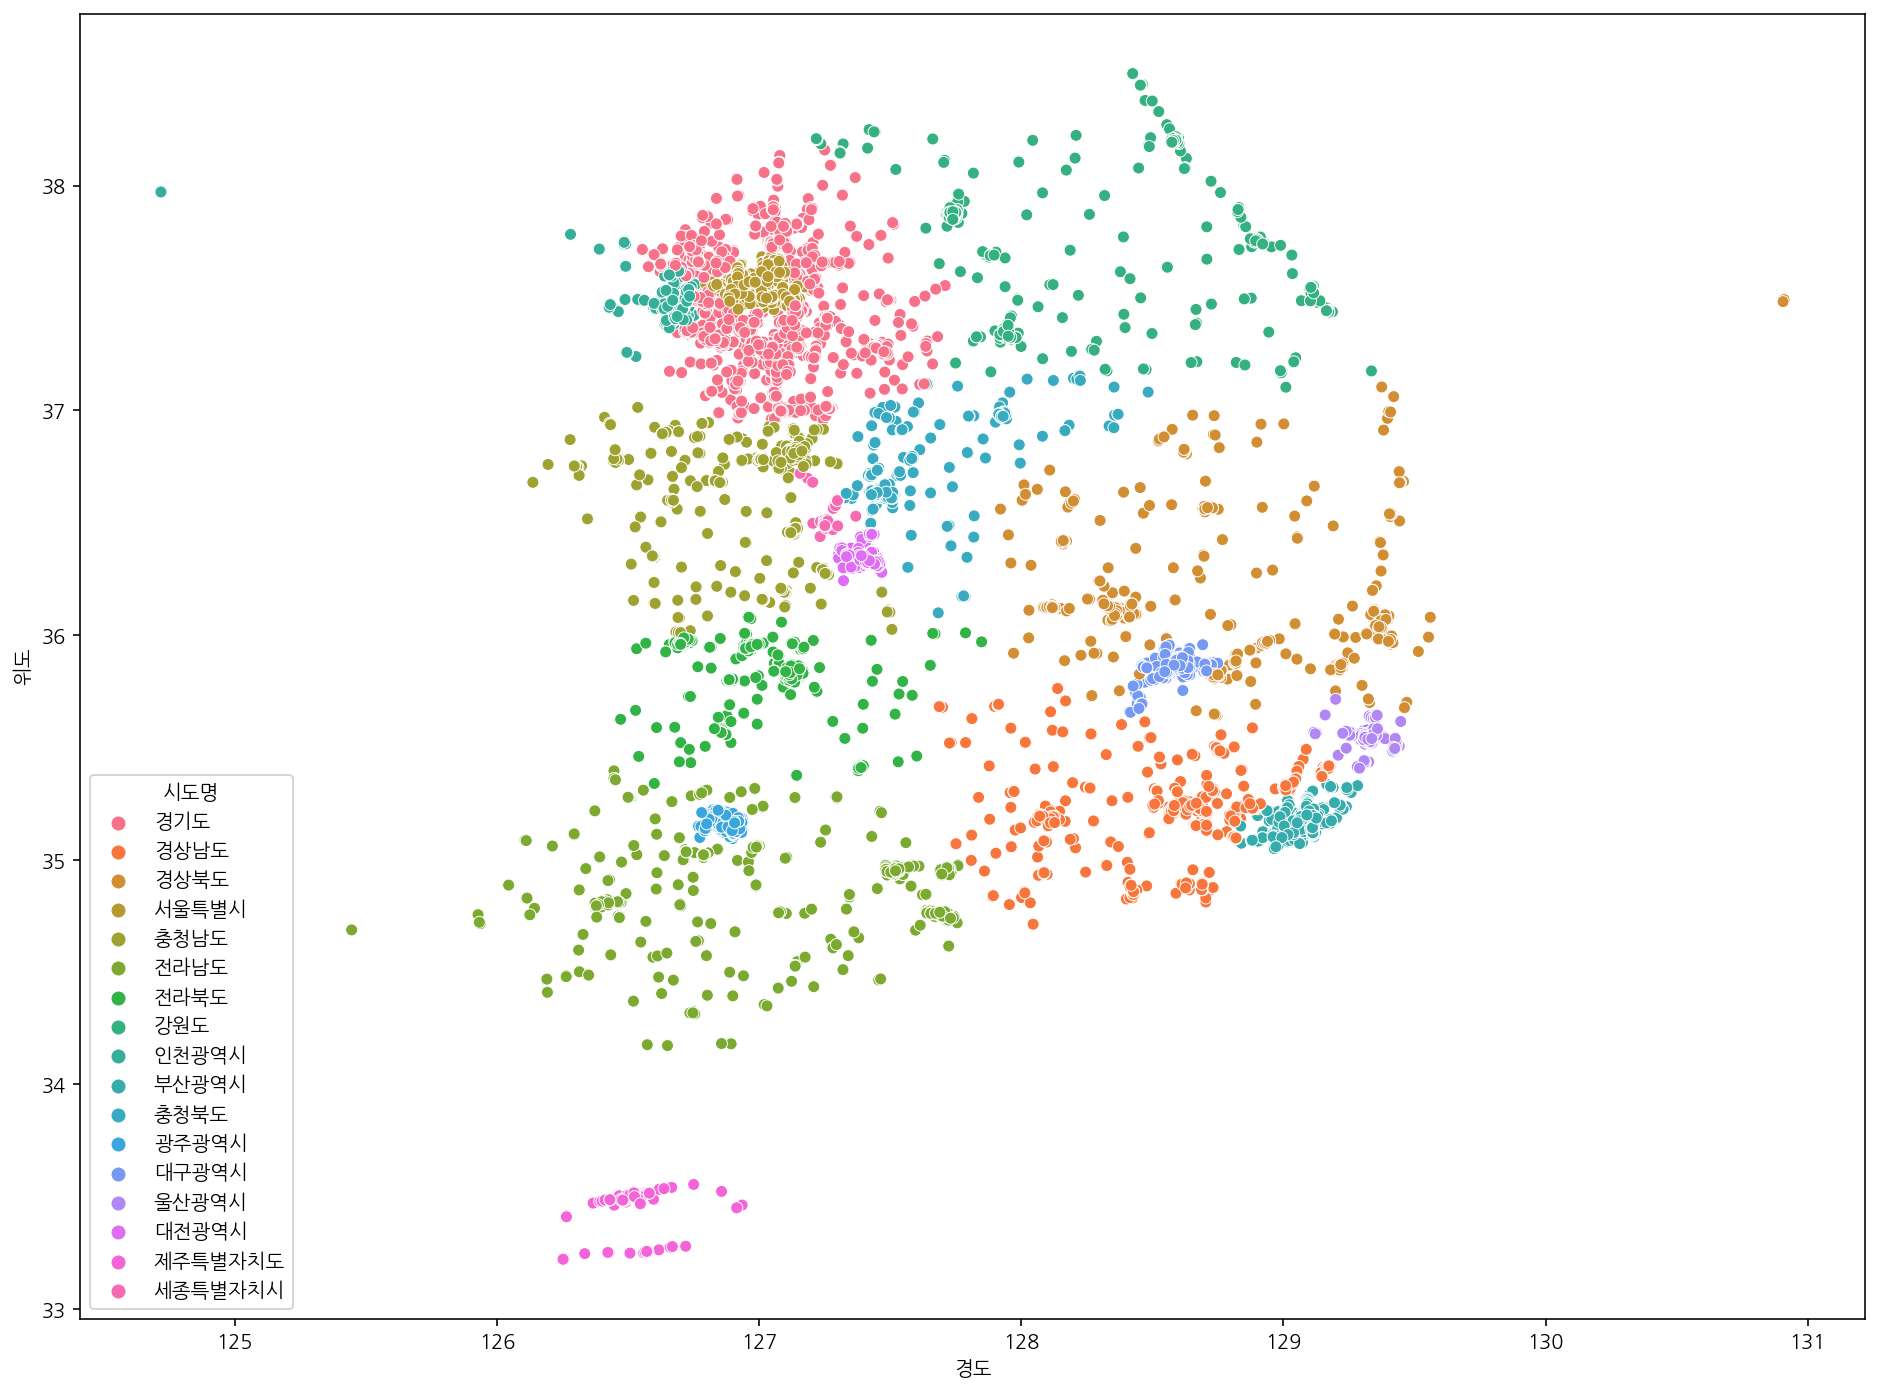

In [ ]:
#Q1 scatterplot 시각화
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_pharmacy, x="경도", y="위도", hue="시도명")

In [ ]:
#Q2

#df.columns  
print(df['상권업종소분류명'].unique()) #동물병원, 수의업-종합, 수의업-기타 를 확인할 수 있음
print(df[df['상권업종소분류명'] == "수의업-기타"]) #수의업-기타는 동물병원과는 거리가 먼 애견미용실, 애견호텔 등의 시설이므로 제외


['산부인과' '내과/외과' '신경외과' '기타병원' '약국' '동물병원' '한약방' '탕제원' '정형/성형외과' '소아과'
 '이비인후과의원' '노인/치매병원' '언어치료' '수의업-종합' '한의원' '치과의원' '침구원' '일반병원' '안과의원'
 '조산원' '한방병원' '종합병원' '유사의료업기타' '응급구조대' '혈액원' '치과병원' '척추교정치료' '피부과' '비뇨기과'
 '치과기공소' '산후조리원' '접골원' '수의업-기타' '제대혈']


In [ ]:
#tmplist = ['동물병원', '수의업-종합']
df_pethosp_index = (df['상권업종소분류명'] == '동물병원')|(df['상권업종소분류명'] == '수의업-종합') #동물병원 또는 수의업-종합인 것들의 불린 인덱싱 
df_pethosp = df[df_pethosp_index]
df_pethosp['시도명'].value_counts()

경기도        1512
서울특별시       838
부산광역시       353
경상남도        323
경상북도        302
인천광역시       284
대구광역시       257
충청남도        238
전라북도        195
강원도         166
전라남도        158
충청북도        151
대전광역시       149
광주광역시       147
울산광역시       116
제주특별자치도      82
세종특별자치시      19
Name: 시도명, dtype: int64

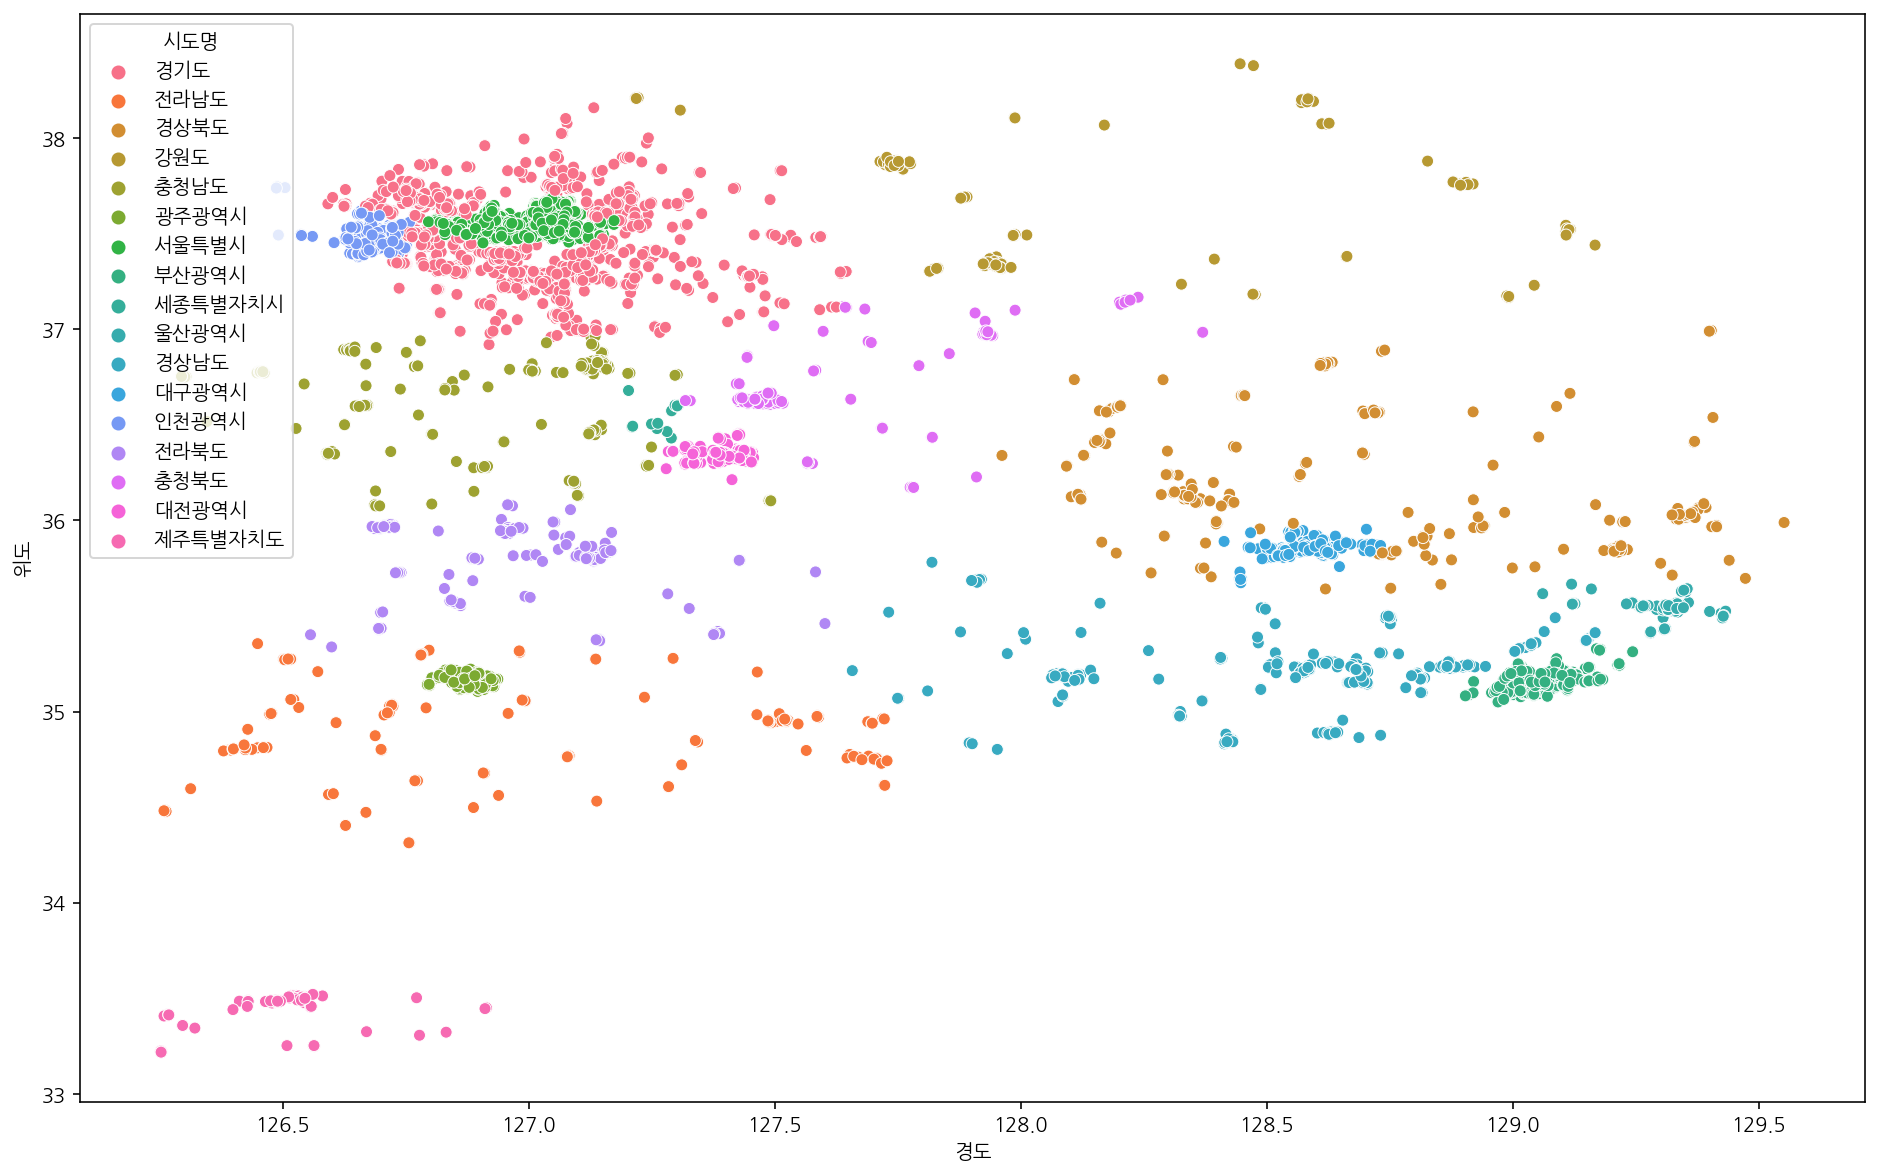

In [ ]:
#Q2 scatterplot 시각화
plt.figure(figsize=(16, 10))
sns.scatterplot(data=df_pethosp, x="경도", y="위도", hue="시도명")


In [ ]:
#Q3
df_skinhosp_index = (df['상권업종소분류명'].str.contains("피부" or "성형")) & (df['시도명'] == '서울특별시') # 서울소재이며 동시에 피부 또는 성형이 들어간 데이터 불린 인덱싱
df_skinhosp_of_seoul = df[df_skinhosp_index]
proportion = df_skinhosp_of_seoul['시군구명'].value_counts(normalize=True).round(3)*100 
proportion

강남구     35.3
서초구     16.2
송파구      4.0
광진구      3.6
강동구      3.3
마포구      3.3
강서구      3.3
성북구      3.1
영등포구     2.9
은평구      2.9
양천구      2.7
중구       2.7
동대문구     2.4
서대문구     2.2
동작구      2.0
노원구      2.0
관악구      1.8
용산구      1.6
중랑구      1.3
구로구      1.1
성동구      0.7
종로구      0.7
도봉구      0.4
강북구      0.2
금천구      0.2
Name: 시군구명, dtype: float64

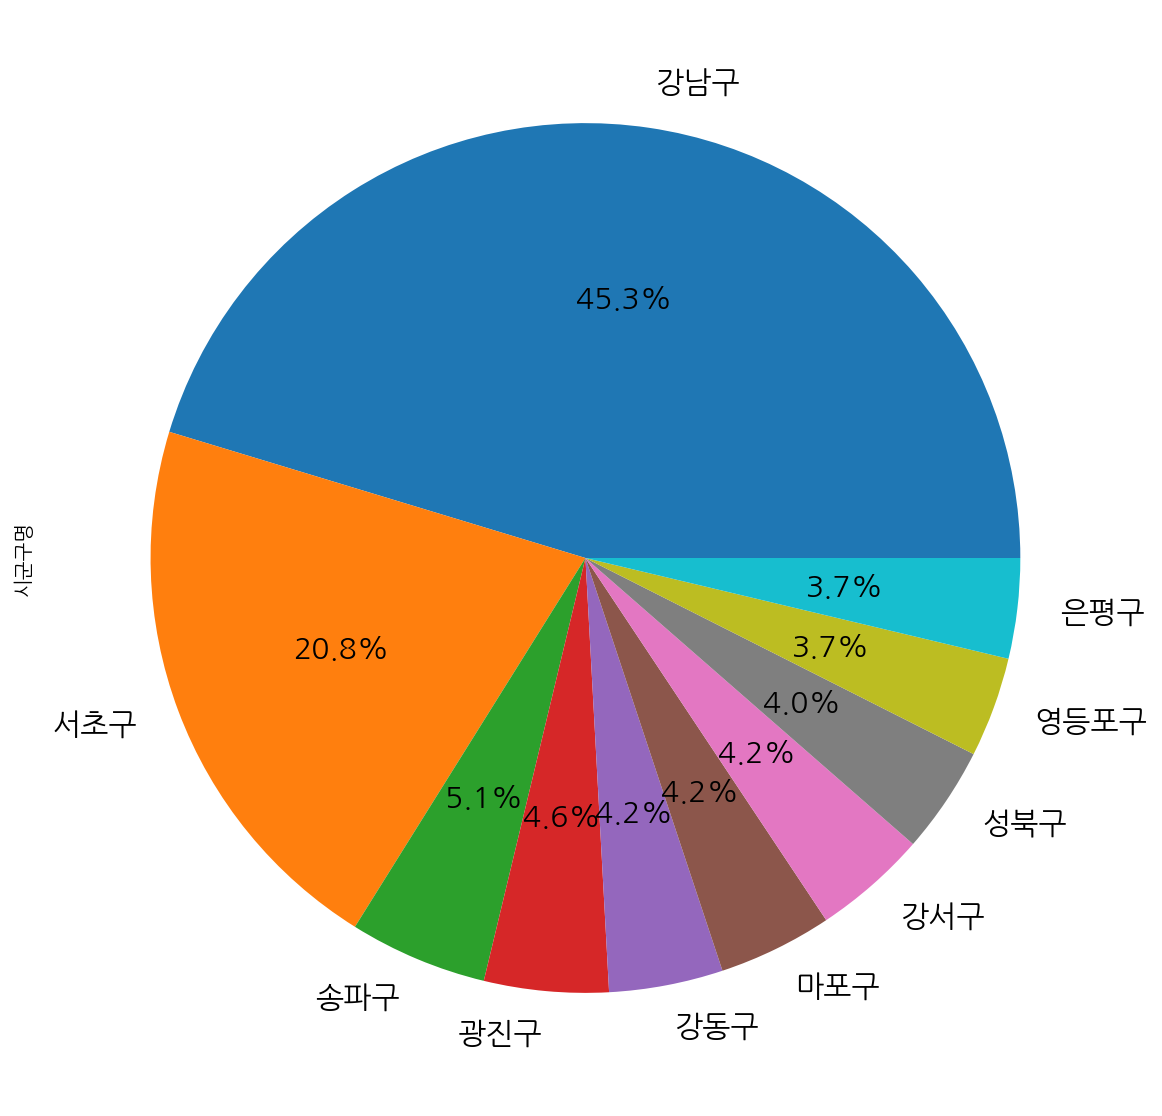

In [ ]:
#Q3 시각화
plt.figure(figsize = (16,10))
proportion.head(10).plot.pie(autopct='%.1f%%', fontsize=15)

In [ ]:
#Q4
import folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_hosp_for_older_index = df['상권업종소분류명'] == '노인/치매병원' #노인/치매병원 불린 인덱싱
df_hosp_for_older = df[df_hosp_for_older_index]

In [ ]:
start_coordinate = [df['위도'].mean(), df['경도'].mean()]

map = folium.Map(location = start_coordinate, zoom_start=7)

for n in df_hosp_for_older.index:
    name = df_hosp_for_older.loc[n, "상호명"]
    address = df_hosp_for_older.loc[n, "도로명주소"]
    popup = f"{name}-{address}"
    location = [df_hosp_for_older.loc[n, "위도"], df_hosp_for_older.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,
    ).add_to(map)

In [ ]:
map